In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()

df.info()
df.describe()
df.target.value_counts()

df.sample(n=2, random_state=22).to_csv('Validation_sample.csv',index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [2]:
y = df[['target']]
x = df.loc[:,df.columns != 'target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=33)

In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(512, 30) (512, 1) (57, 30) (57, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(30,)))
model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.summary()

2024-01-04 18:42:29.433651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 300)               9300      
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 602       
                                                                 
Total params: 9902 (38.68 KB)
Trainable params: 9902 (38.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(x_train_s,y_train, epochs=10,validation_split=0.2, verbose=2)
y_train_predict = model.predict(x_train_s)
y_test_predict = model.predict(x_test_s)

Epoch 1/10
13/13 - 1s - loss: 0.3849 - accuracy: 0.8631 - val_loss: 0.1510 - val_accuracy: 0.9709 - 840ms/epoch - 65ms/step
Epoch 2/10
13/13 - 0s - loss: 0.1568 - accuracy: 0.9487 - val_loss: 0.1005 - val_accuracy: 0.9612 - 62ms/epoch - 5ms/step
Epoch 3/10
13/13 - 0s - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.0825 - val_accuracy: 0.9806 - 39ms/epoch - 3ms/step
Epoch 4/10
13/13 - 0s - loss: 0.1121 - accuracy: 0.9633 - val_loss: 0.0765 - val_accuracy: 0.9806 - 61ms/epoch - 5ms/step
Epoch 5/10
13/13 - 0s - loss: 0.1007 - accuracy: 0.9682 - val_loss: 0.0695 - val_accuracy: 0.9806 - 50ms/epoch - 4ms/step
Epoch 6/10
13/13 - 0s - loss: 0.0955 - accuracy: 0.9682 - val_loss: 0.0618 - val_accuracy: 0.9806 - 58ms/epoch - 4ms/step
Epoch 7/10
13/13 - 0s - loss: 0.0903 - accuracy: 0.9756 - val_loss: 0.0574 - val_accuracy: 0.9806 - 49ms/epoch - 4ms/step
Epoch 8/10
13/13 - 0s - loss: 0.0812 - accuracy: 0.9707 - val_loss: 0.0545 - val_accuracy: 0.9806 - 39ms/epoch - 3ms/step
Epoch 9/10
13/13 - 0s 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


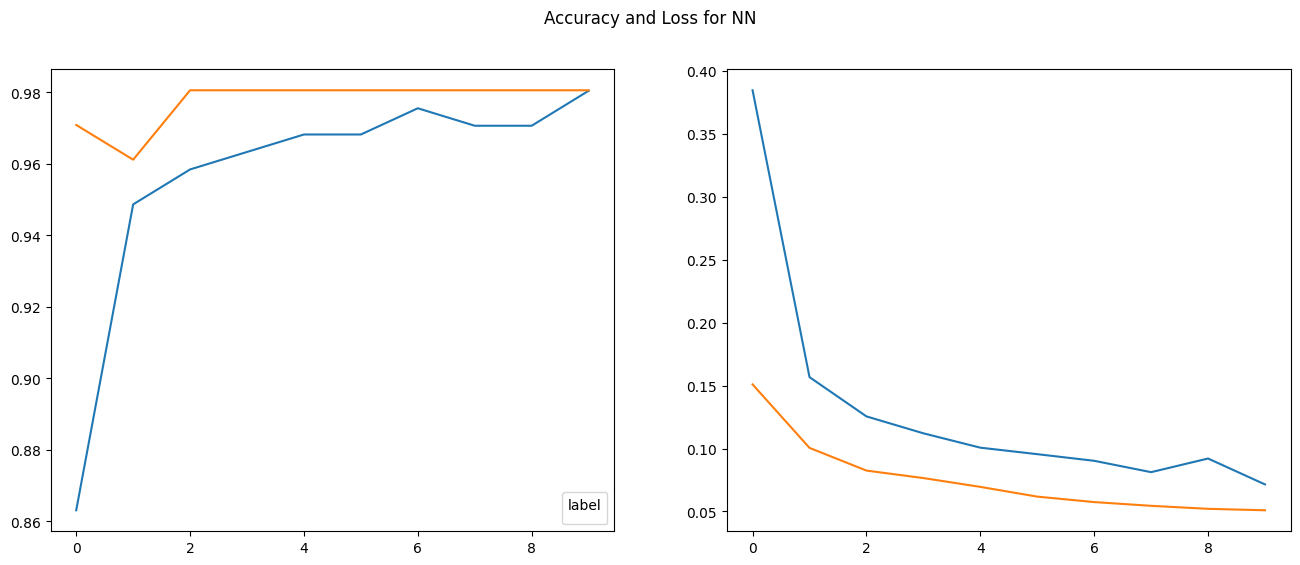

In [9]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(title= 'label',loc='lower right')
plt.show()


In [10]:
test_loss, test_accuracy = model.evaluate(x_test_s,y_test)
train_loss, train_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
print(f'Test accuracy : {test_accuracy:.2f}\n',f'Train accuracy : {train_accuracy:.2f}\n',
      f'Test loss : {test_loss:.2f}\n',f'Train loss : {train_loss:.2f}\n')


2/2 [==============================] - 0s 5ms/step - loss: 0.0556 - accuracy: 1.0000
Test accuracy : 1.00
 Train accuracy : 0.98
 Test loss : 0.06
 Train loss : 0.07



In [82]:
test_predict = [np.argmax(i) for i in y_test_predict]
print(test_predict)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [14]:
import pickle
pickle.dump(scaler,open('standardscaler.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))